In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income,Unnamed: 3
0,Rob,27,70000,NaN
1,Michael,29,90000,NaN
2,Mohan,29,61000,NaN
3,Ismail,28,60000,NaN
4,Kory,42,150000,NaN


Text(0, 0.5, 'Income')

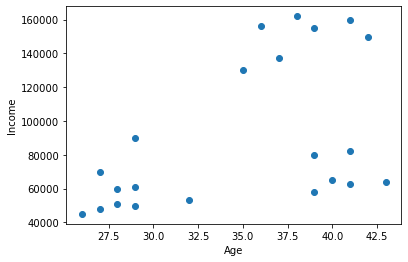

In [3]:
plt.scatter(df.Age,df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [5]:
km = KMeans(n_clusters=3) #seeing the diagram it seems there are 3 cluster
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [6]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,Unnamed: 3,cluster
0,Rob,27,70000,NaN,2
1,Michael,29,90000,NaN,2
2,Mohan,29,61000,NaN,1
3,Ismail,28,60000,NaN,1
4,Kory,42,150000,NaN,0


No handles with labels found to put in legend.


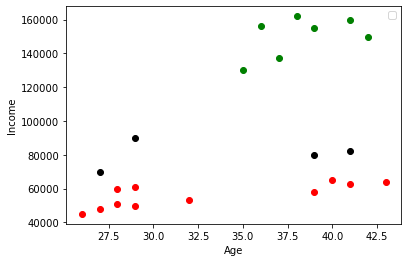

In [8]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

Preprocessing using MinMax Scaler

In [10]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income,Unnamed: 3,cluster
0,Rob,0.058824,0.213675,NaN,2
1,Michael,0.176471,0.384615,NaN,2
2,Mohan,0.176471,0.136752,NaN,1
3,Ismail,0.117647,0.128205,NaN,1
4,Kory,0.941176,0.897436,NaN,0


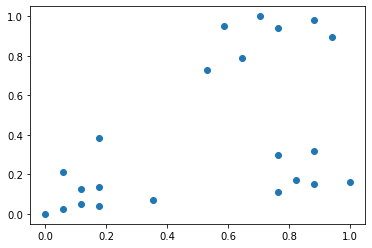

In [11]:
plt.scatter(df.Age,df['Income'])

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [13]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,Unnamed: 3,cluster
0,Rob,0.058824,0.213675,NaN,1
1,Michael,0.176471,0.384615,NaN,1
2,Mohan,0.176471,0.136752,NaN,1
3,Ismail,0.117647,0.128205,NaN,1
4,Kory,0.941176,0.897436,NaN,0


In [14]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

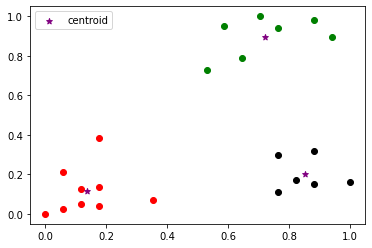

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Elbow Plot

In [17]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

C:\Users\Arutkeerthi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


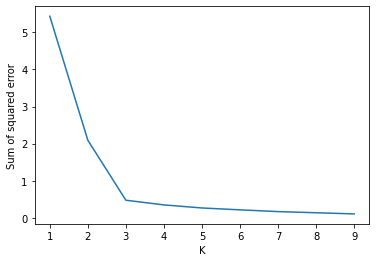

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)